# Connectivity matrix extraction example

In [1]:
import obi_one as obi
from pathlib import Path

In [2]:
input_root = Path("../../data/tiny_circuits")
output_root = Path("../../../../obi-output/connectivity_matrix_extraction")

### Run connectivity matrix extraction

In [3]:
connectivity_matrix_extractions_scan_config = obi.ConnectivityMatrixExtractionScanConfig(
                    initialize=obi.ConnectivityMatrixExtractionScanConfig.Initialize(
                        circuit=[obi.Circuit(name="N_10__top_nodes_dim6", path=str(input_root / "N_10__top_nodes_dim6" / "circuit_config.json")),
                                 obi.Circuit(name="N_10__top_rc_nodes_dim2_rc", path=str(input_root / "N_10__top_rc_nodes_dim2_rc" / "circuit_config.json"))],
                        edge_population="S1nonbarrel_neurons__S1nonbarrel_neurons__chemical",
                        # node_attributes=None,
                        node_attributes=("synapse_class", "layer", "mtype", "etype", "x", "y", "z"),
                    )
)

grid_scan = obi.GridScanGenerationTask(form=connectivity_matrix_extractions_scan_config, output_root=str(output_root), coordinate_directory_option="VALUE")

In [4]:
grid_scan.execute()
obi.run_tasks_for_generated_scan(grid_scan)

[2025-09-26 10:10:49,288] INFO: Info: Running idx 0
[2025-09-26 10:10:49,288] INFO: Info: Loading circuit 'N_10__top_nodes_dim6'
[2025-09-26 10:10:49,289] INFO: Node properties to extract: ('synapse_class', 'layer', 'mtype', 'etype', 'x', 'y', 'z')
[2025-09-26 10:10:49,290] INFO: Extracting connectivity from edge population 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'


100%|██████████| 10/10 [00:00<00:00, 1315.45it/s]

[2025-09-26 10:10:49,382] INFO: Connectivity matrix successfully written to '../../../../obi-output/connectivity_matrix_extraction/N_10__top_nodes_dim6/connectivity_matrix.h5'
[2025-09-26 10:10:49,383] INFO: Info: Running idx 1
[2025-09-26 10:10:49,383] INFO: Info: Loading circuit 'N_10__top_rc_nodes_dim2_rc'
[2025-09-26 10:10:49,384] INFO: Node properties to extract: ('synapse_class', 'layer', 'mtype', 'etype', 'x', 'y', 'z')
[2025-09-26 10:10:49,384] INFO: Extracting connectivity from edge population 'S1nonbarrel_neurons__S1nonbarrel_neurons__chemical'



100%|██████████| 10/10 [00:00<00:00, 2533.56it/s]

[2025-09-26 10:10:49,418] INFO: Connectivity matrix successfully written to '../../../../obi-output/connectivity_matrix_extraction/N_10__top_rc_nodes_dim2_rc/connectivity_matrix.h5'


In [5]:
# Display the intermediary data
grid_scan.multiple_value_parameters(display=True)
grid_scan.coordinate_parameters(display=True)
# grid_scan.coordinate_instances(display=True)

[2025-09-26 10:10:49,422] INFO: 
MULTIPLE VALUE PARAMETERS
[2025-09-26 10:10:49,422] INFO: initialize.circuit: [Circuit(name='N_10__top_nodes_dim6', path='../../data/tiny_circuits/N_10__top_nodes_dim6/circuit_config.json', matrix_path=None, type='Circuit'), Circuit(name='N_10__top_rc_nodes_dim2_rc', path='../../data/tiny_circuits/N_10__top_rc_nodes_dim2_rc/circuit_config.json', matrix_path=None, type='Circuit')]
[2025-09-26 10:10:49,422] INFO: 
COORDINATE PARAMETERS
[2025-09-26 10:10:49,423] INFO: initialize.circuit: N_10__top_nodes_dim6
[2025-09-26 10:10:49,423] INFO: initialize.circuit: N_10__top_rc_nodes_dim2_rc


[SingleCoordinateScanParams(scan_params=[SingleValueScanParam(location_list=['initialize', 'circuit'], type='SingleValueScanParam', value=Circuit(name='N_10__top_nodes_dim6', path='../../data/tiny_circuits/N_10__top_nodes_dim6/circuit_config.json', matrix_path=None, type='Circuit'))], nested_coordinate_subpath_str=PosixPath('.'), type='SingleCoordinateScanParams'),
 SingleCoordinateScanParams(scan_params=[SingleValueScanParam(location_list=['initialize', 'circuit'], type='SingleValueScanParam', value=Circuit(name='N_10__top_rc_nodes_dim2_rc', path='../../data/tiny_circuits/N_10__top_rc_nodes_dim2_rc/circuit_config.json', matrix_path=None, type='Circuit'))], nested_coordinate_subpath_str=PosixPath('.'), type='SingleCoordinateScanParams')]

### Check & plot extracted connectivity matrices

Connectivity matrix extracted from 'N_10__top_nodes_dim6': 10 neurons, 23 connections, 176 synapses


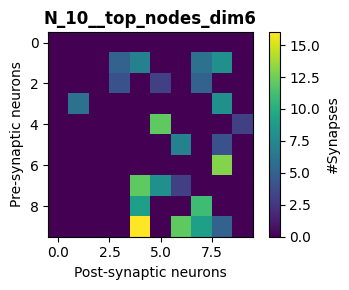

Connectivity matrix extracted from 'N_10__top_rc_nodes_dim2_rc': 10 neurons, 5 connections, 19 synapses


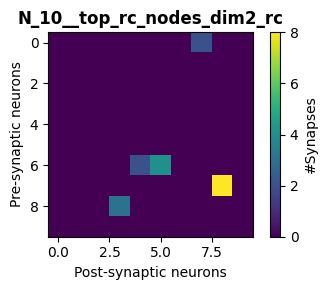

In [6]:
# Check matrices
from conntility.connectivity import ConnectivityMatrix
import matplotlib.pyplot as plt

for circuit in connectivity_matrix_extractions_scan_config.initialize.circuit:
    cmat = ConnectivityMatrix.from_h5(output_root / circuit.name / "connectivity_matrix.h5")
    print(f"Connectivity matrix extracted from '{circuit.name}': {cmat.vertices.shape[0]} neurons, {cmat.matrix.size} connections, {cmat.matrix.sum()} synapses")

    plt.figure(figsize=(4, 3))
    plt.imshow(cmat.dense_matrix, interpolation="nearest")
    plt.xlabel("Post-synaptic neurons")
    plt.ylabel("Pre-synaptic neurons")
    plt.title(circuit.name, fontweight="bold")
    plt.colorbar(label="#Synapses")
    plt.tight_layout()
    plt.show()